In [1]:
#Defining our chosen earthquake's parameters
# Magnitude
minmag = 8
# Time range
start = "2004-01-01"
end = "2004-12-31"

In [2]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

#We use the IRIS datacenter because at the time of the event, the data center was operating and collecting data.
#The values recorded are closer to the values observed in scientific papers.
#The magnitude is more accurate and reflects on the actual energy of the event.
events = Client("IRIS").get_events(
    minmagnitude=minmag,
    starttime=UTCDateTime(start),
    endtime=UTCDateTime(end),
)

print("\nFound %s event(s) from IRIS Data Center:\n" % len(events))
print(events)


Found 2 event(s) from IRIS Data Center:

2 Event(s) in Catalog:
2004-12-26T00:58:52.050000Z |  +3.413,  +95.901 | 9.0  MW
2004-12-23T14:59:00.680000Z | -49.710, +161.576 | 8.1  MW


In [3]:
#2 events are detected. We will study only the first one.
n = 0
print(events[n])

Event:	2004-12-26T00:58:52.050000Z |  +3.413,  +95.901 | 9.0  MW

	            resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=1916079")
	             event_type: 'earthquake'
	    preferred_origin_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?originid=3788623")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?magnitudeid=18508217")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


In [4]:
print("mag =", events[n].magnitudes[0].mag)
eqo = events[n].origins[0]
print("eqo.latitude =", eqo.latitude)
print("eqo.longitude =", eqo.longitude)
#print("eqo.depth =", eqo.depth)

mag = 9.0
eqo.latitude = 3.4125
eqo.longitude = 95.9012


In [5]:
start = eqo.time
print("eqo start =", start)


eqo start = 2004-12-26T00:58:52.050000Z


In [6]:
#Using IRIS datacenter, download seismic data aquired by all stations of the G nerwork
#Use of network G as it is a global network because the earthquake is a teleseism and using network G 
#allows us to access the registry containing data from international stations
#We used LHZ because this channel represents a Long period seismometer. Large broadband.
start = UTCDateTime(start)
print(f"Start: {start}")
print(f"End: {start + 14400}")

st = Client("IRIS").get_waveforms(
    network="G",
    station="*",
    location="00",
    channel="LHZ",
    starttime=start,
    endtime=start + 14400,
    attach_response=True,
)

print(st)

Start: 2004-12-26T00:58:52.050000Z
End: 2004-12-26T04:58:52.050000Z
12 Trace(s) in Stream:
G.AIS.00.LHZ  | 2004-12-26T00:58:52.102612Z - 2004-12-26T04:58:51.102612Z | 1.0 Hz, 14400 samples
G.CRZF.00.LHZ | 2004-12-26T00:58:52.296337Z - 2004-12-26T04:58:51.296337Z | 1.0 Hz, 14400 samples
G.DRV.00.LHZ  | 2004-12-26T00:58:52.260336Z - 2004-12-26T04:58:51.260336Z | 1.0 Hz, 14400 samples
G.ECH.00.LHZ  | 2004-12-26T00:58:52.978335Z - 2004-12-26T04:58:51.978335Z | 1.0 Hz, 14400 samples
G.FDF.00.LHZ  | 2004-12-26T00:58:53.000000Z - 2004-12-26T04:58:52.000000Z | 1.0 Hz, 14400 samples
G.KIP.00.LHZ  | 2004-12-26T00:58:52.760646Z - 2004-12-26T04:58:51.760646Z | 1.0 Hz, 14400 samples
G.MBO.00.LHZ  | 2004-12-26T00:58:52.896335Z - 2004-12-26T04:58:51.896335Z | 1.0 Hz, 14400 samples
G.MPG.00.LHZ  | 2004-12-26T00:58:52.613000Z - 2004-12-26T04:58:51.613000Z | 1.0 Hz, 14400 samples
G.PAF.00.LHZ  | 2004-12-26T00:58:52.920338Z - 2004-12-26T04:58:51.920338Z | 1.0 Hz, 14400 samples
G.RER.00.LHZ  | 2004-12-26T

In [7]:
#Those are the stations we will use in our observations
for tr in st:
    print(tr.stats.station)

AIS
CRZF
DRV
ECH
FDF
KIP
MBO
MPG
PAF
RER
SSB
WUS


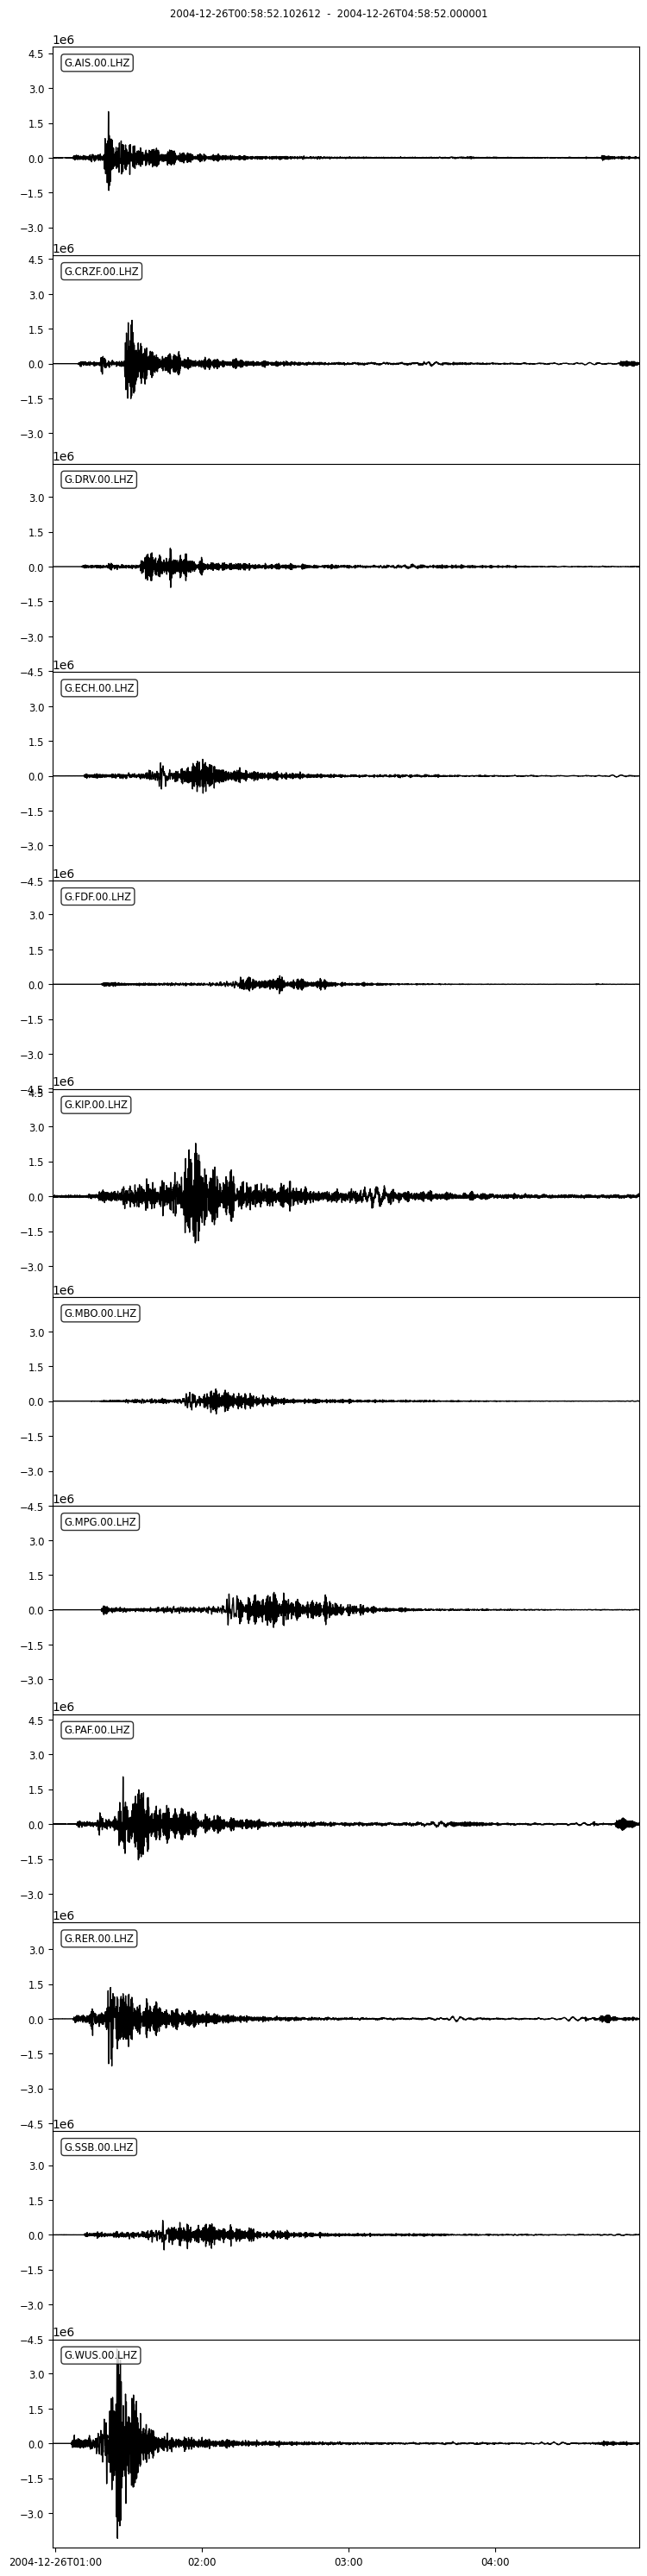

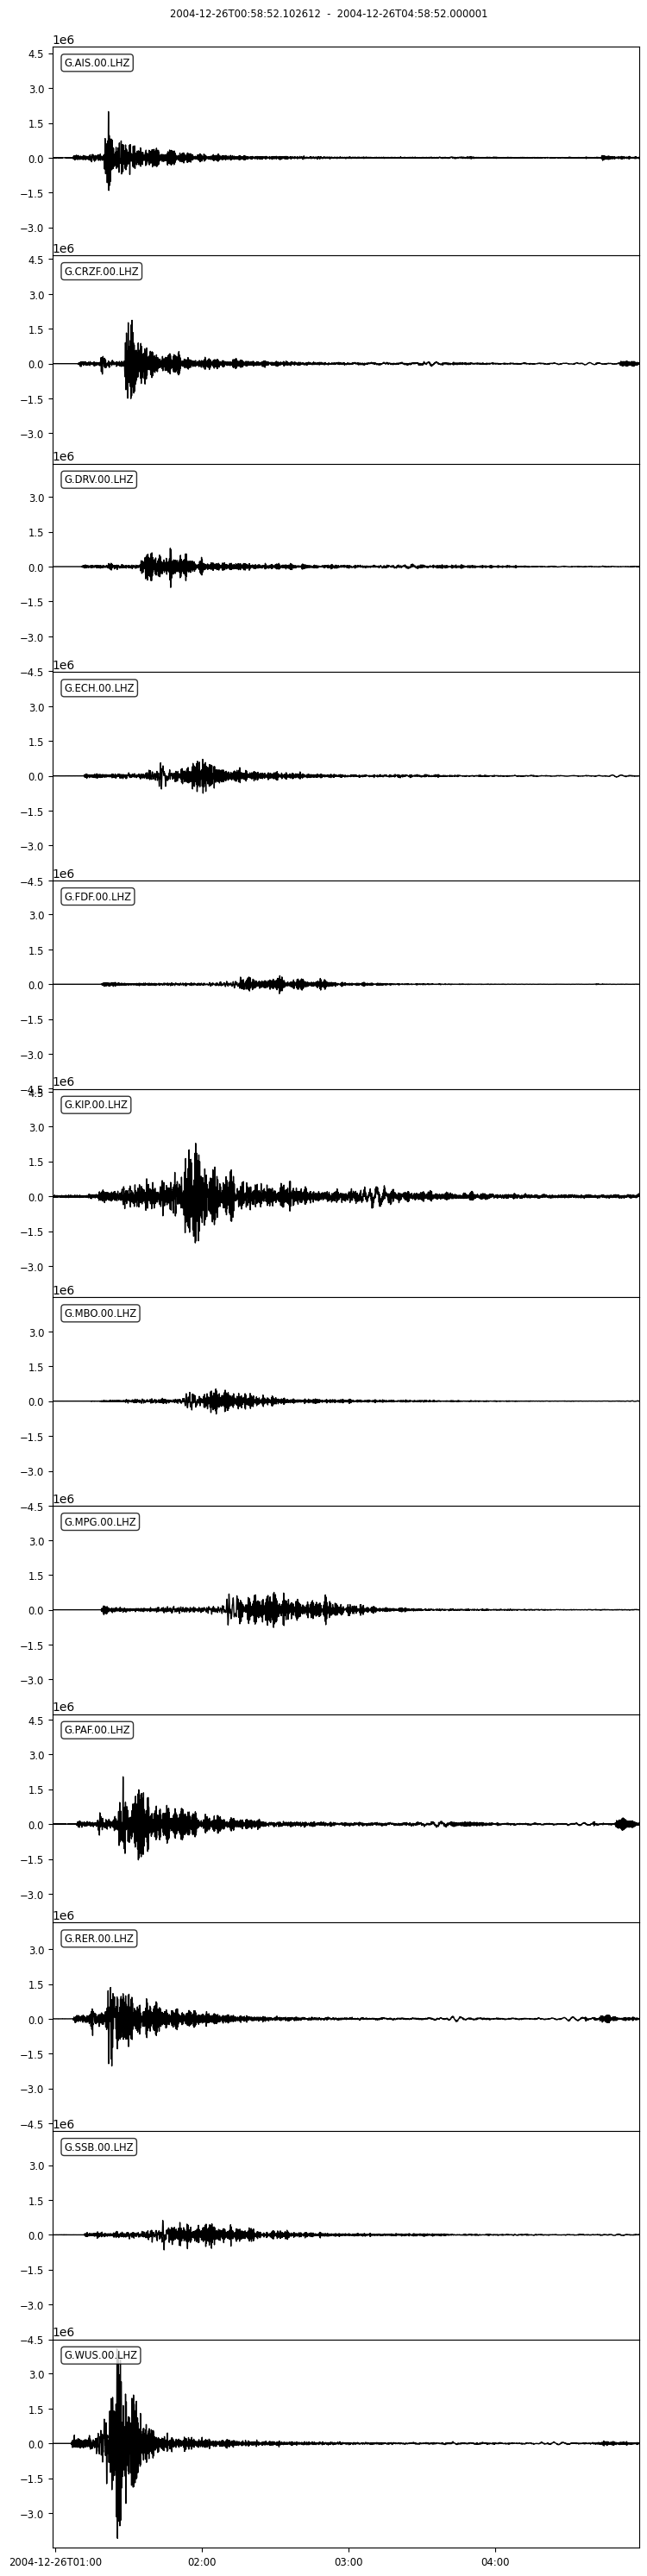

In [8]:
stplot=st.copy()
stplot_unfil = st.copy()
stplot.plot()

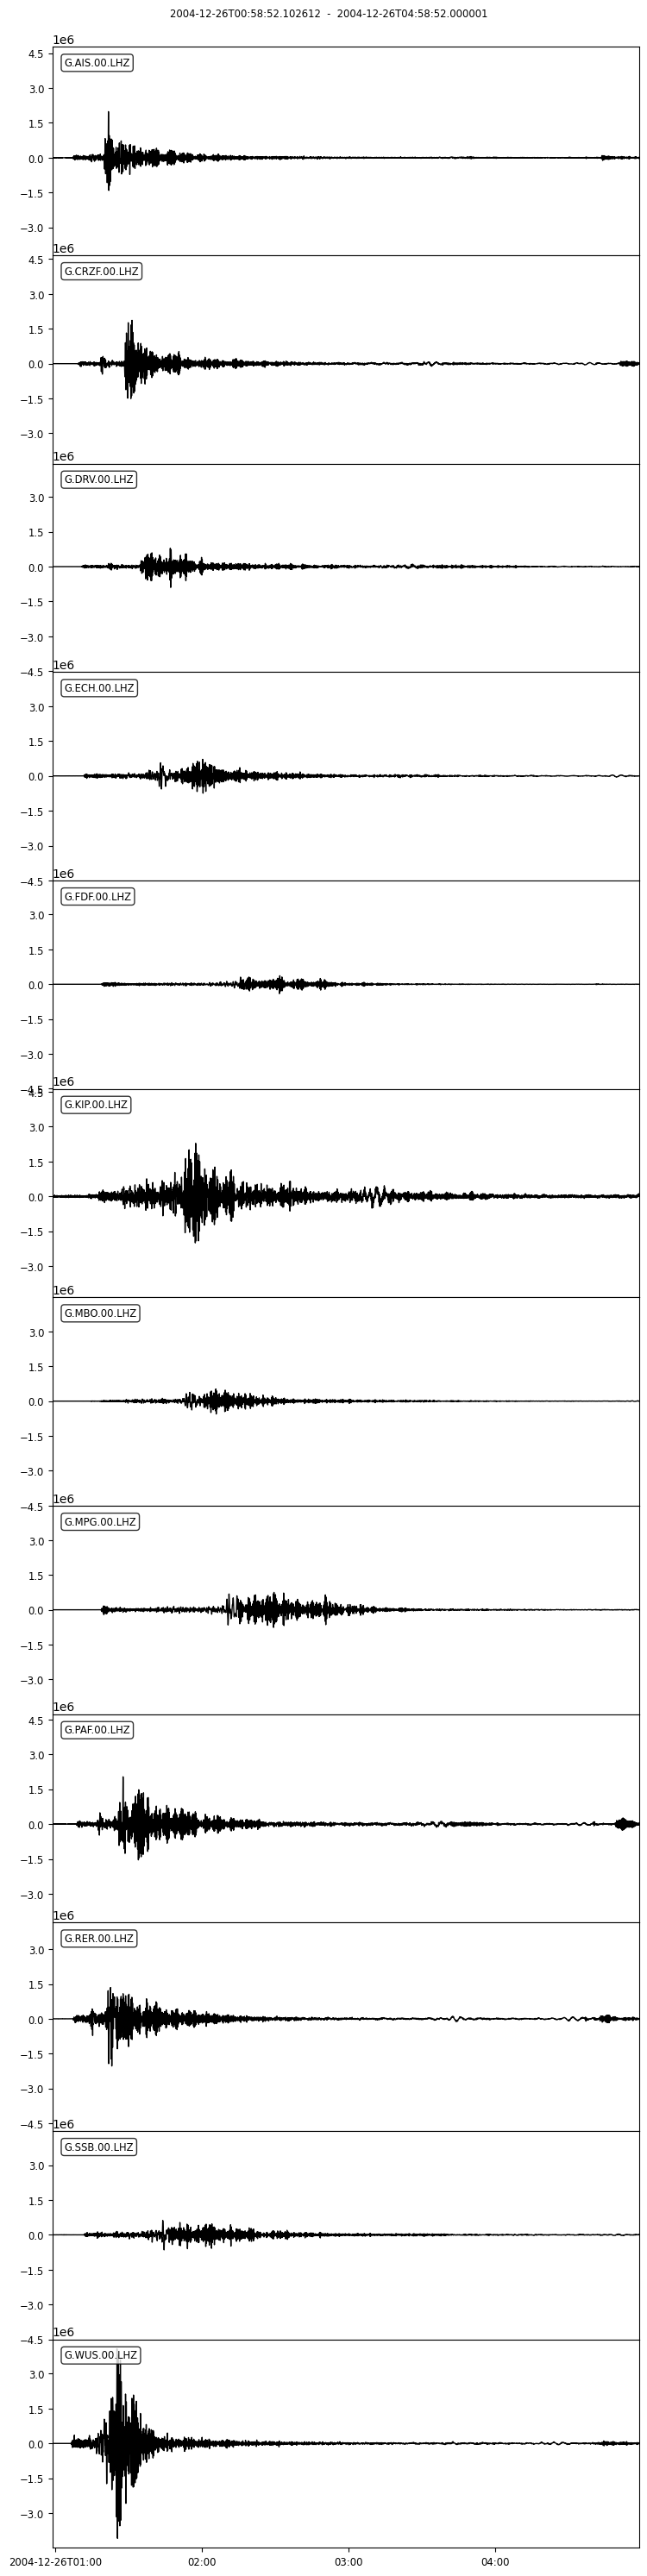

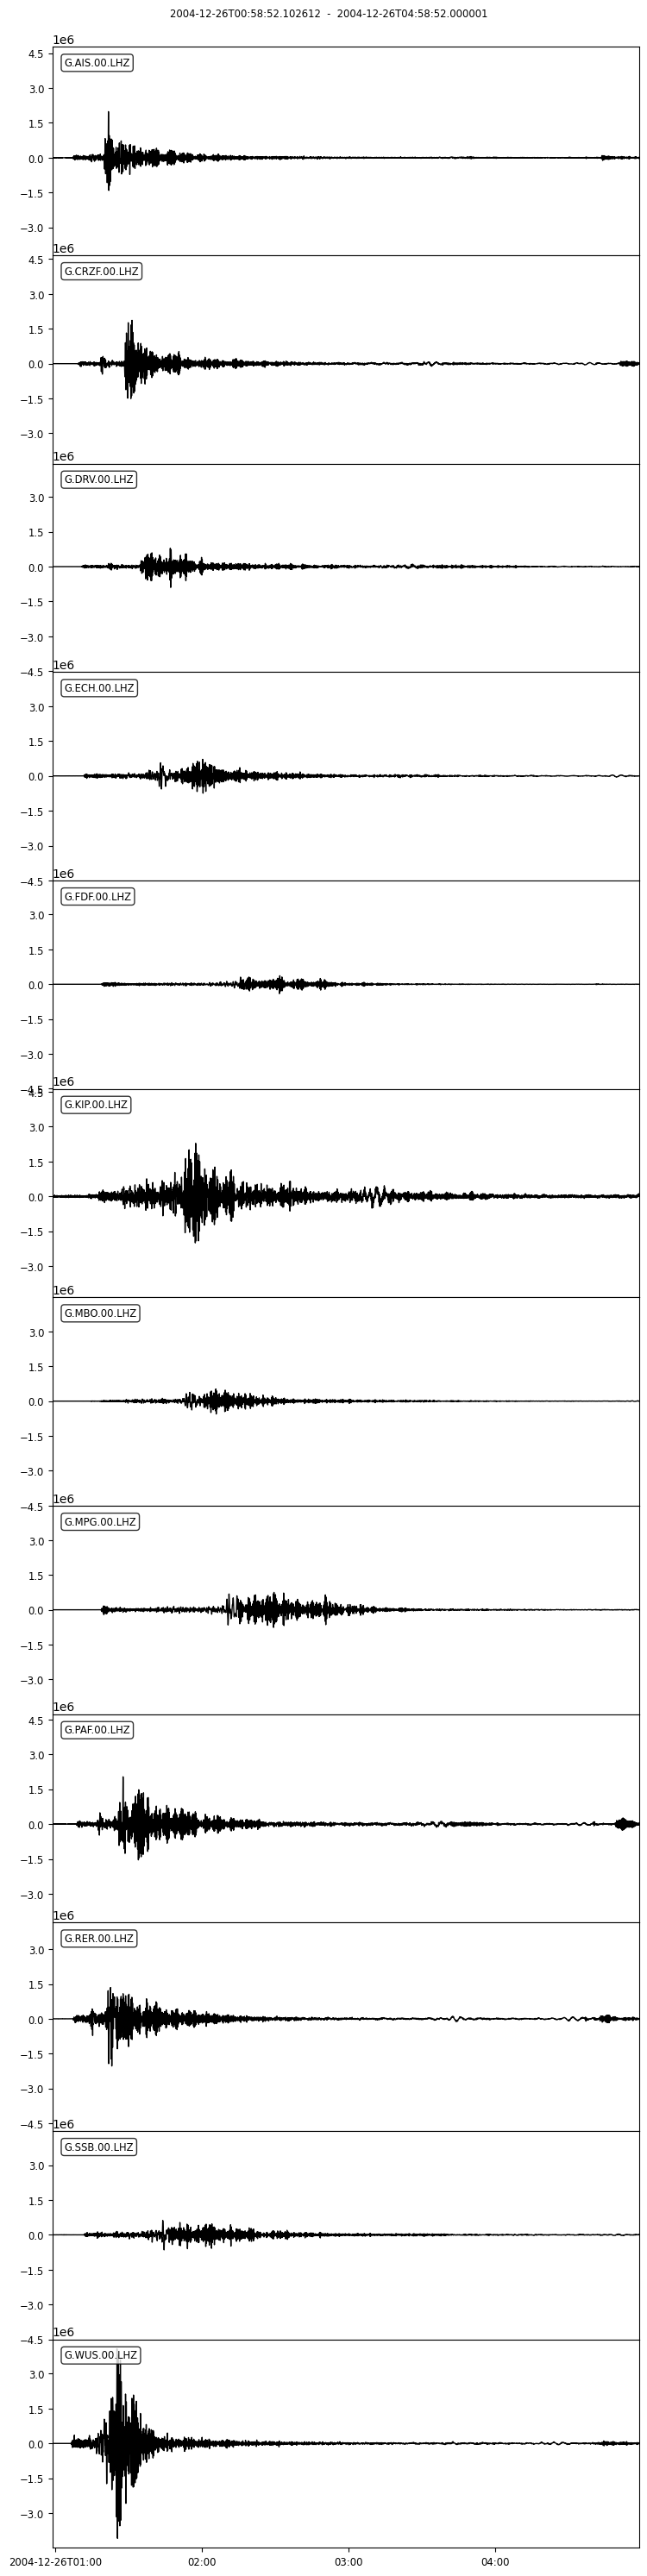

In [9]:
#Data manipulation
#Removing the mean
st_rem_mean = st.copy()
st_rem_mean.detrend("demean")
st_rem_mean.plot()

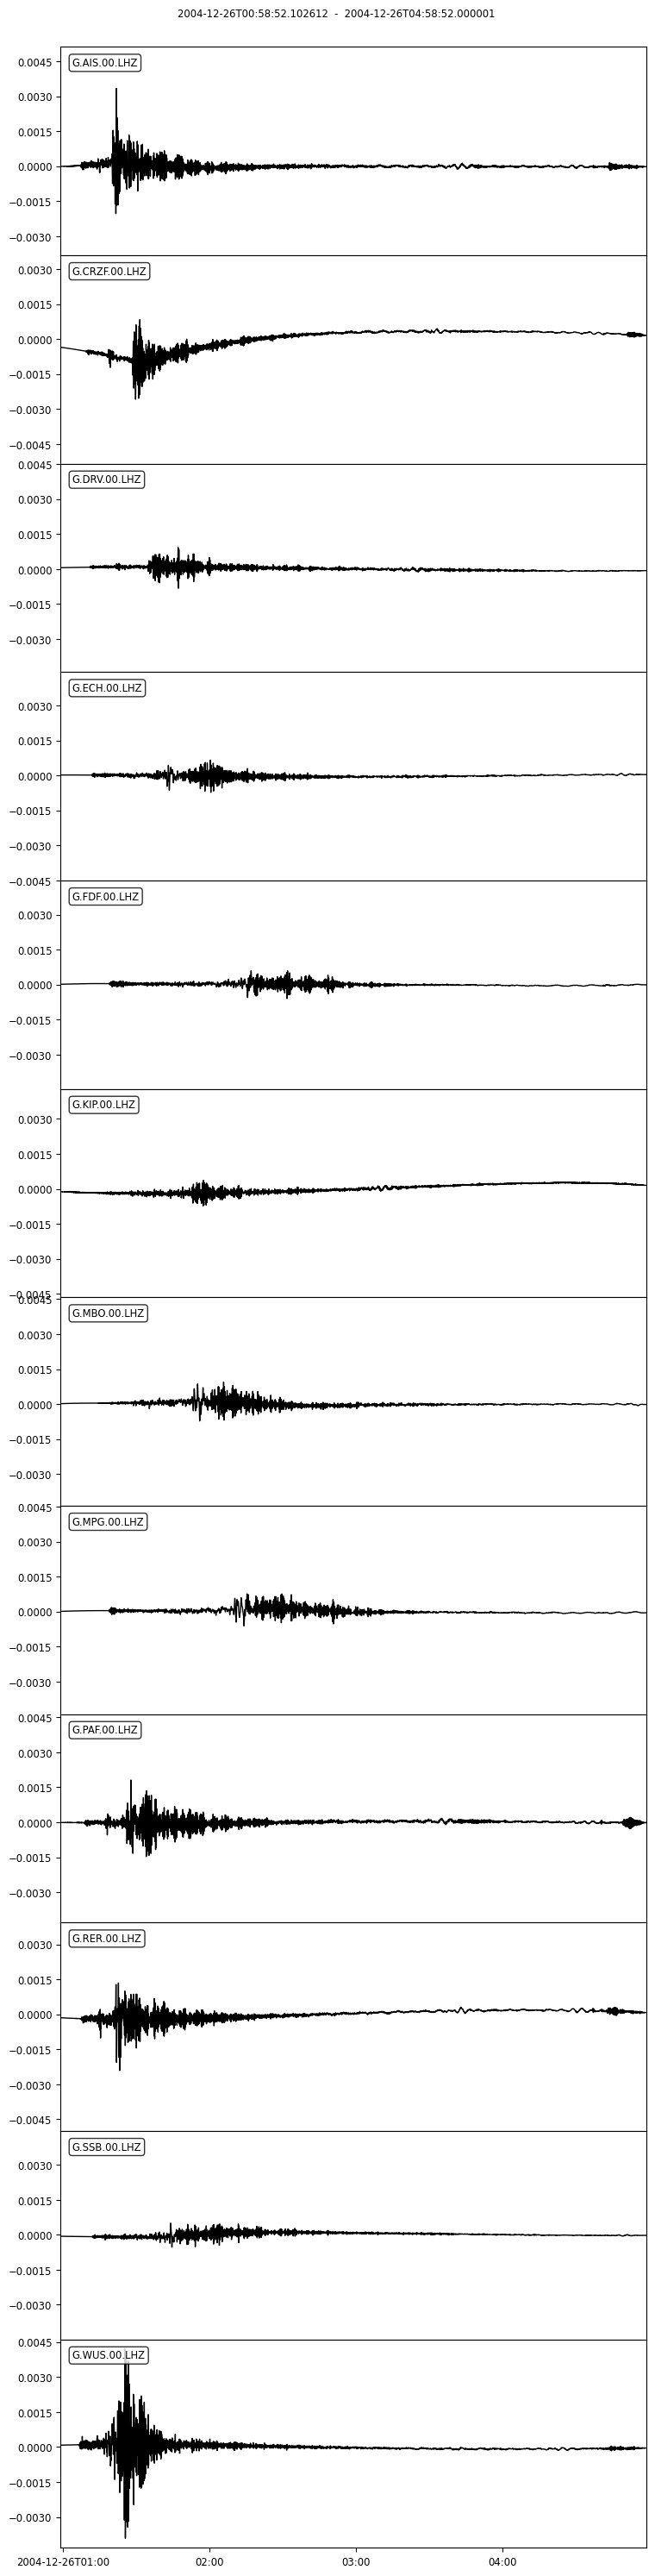

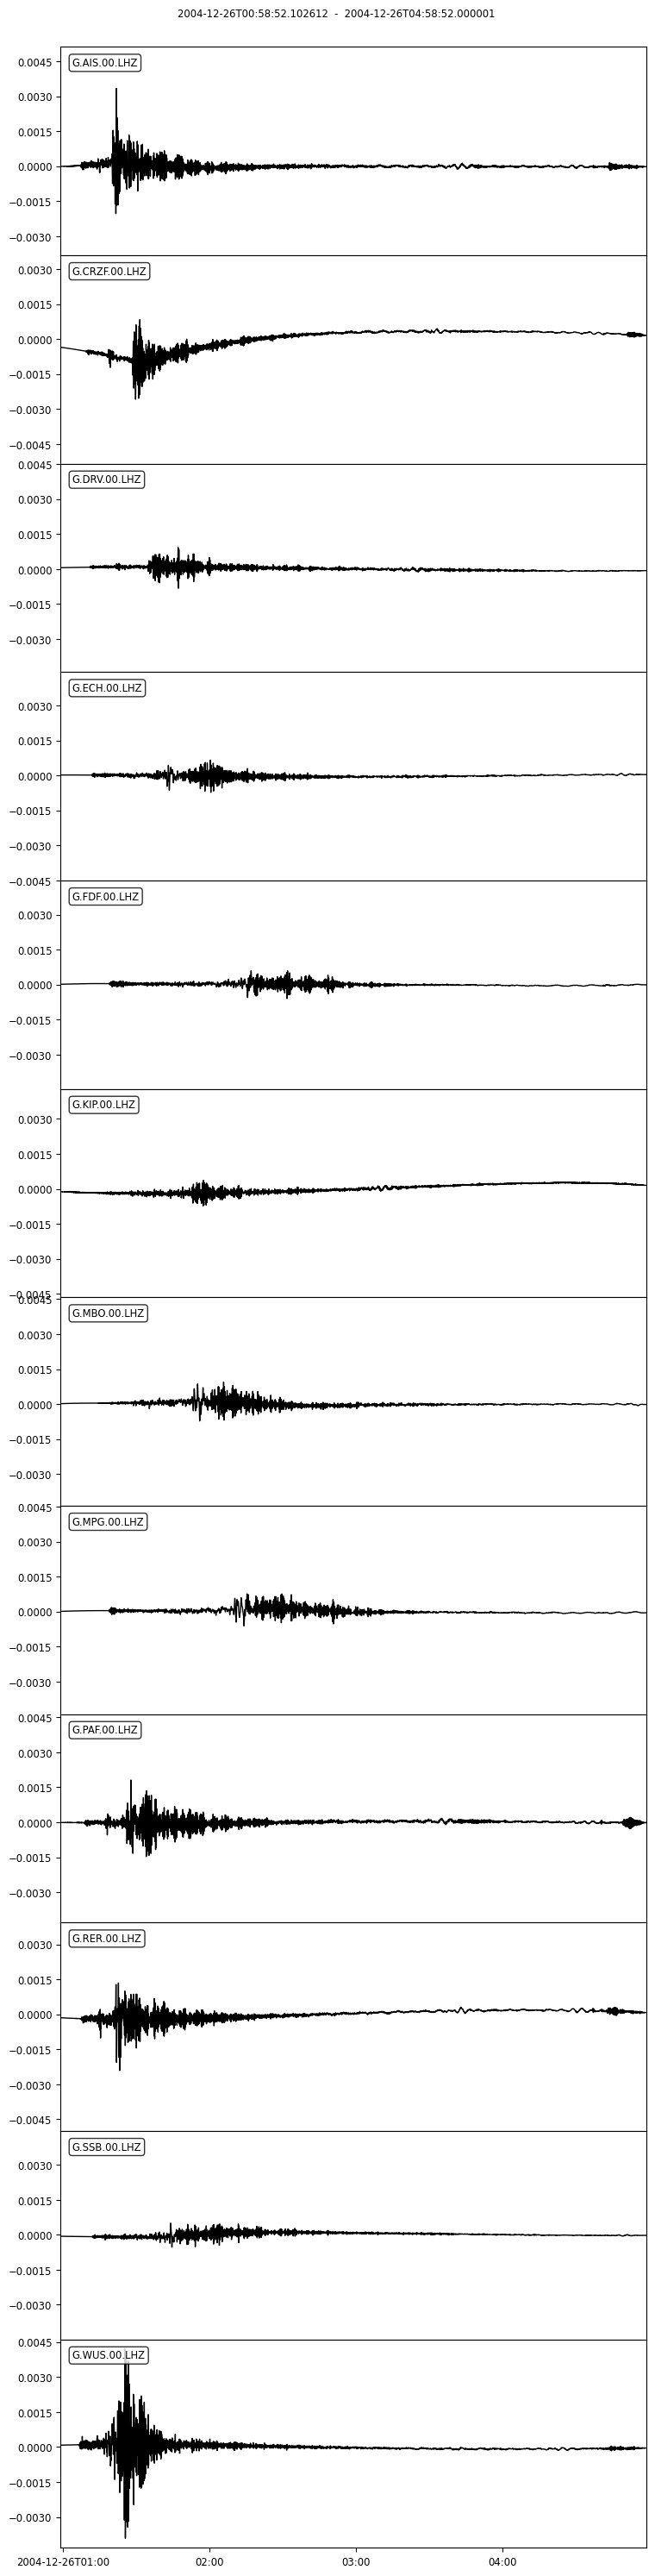

In [10]:
#Removing the instrumental response to improve the quality of our signal after removing the mean
st_rem_mean.remove_response(output="VEL")
st_rem_mean.plot()

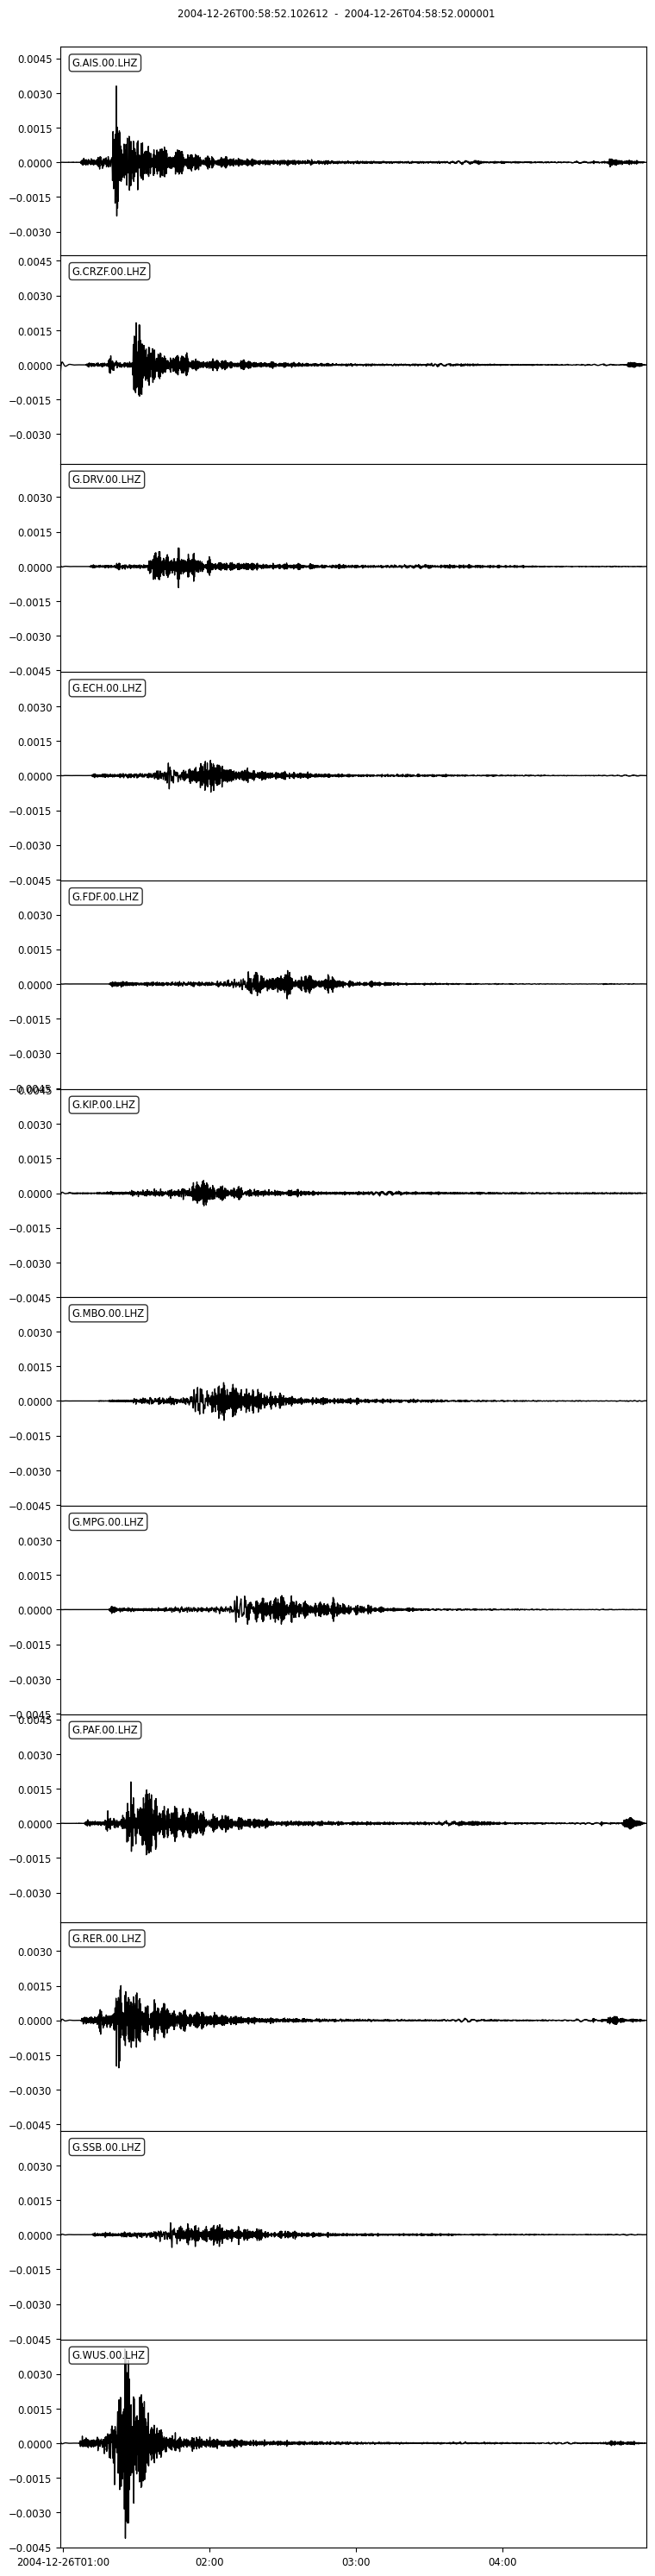

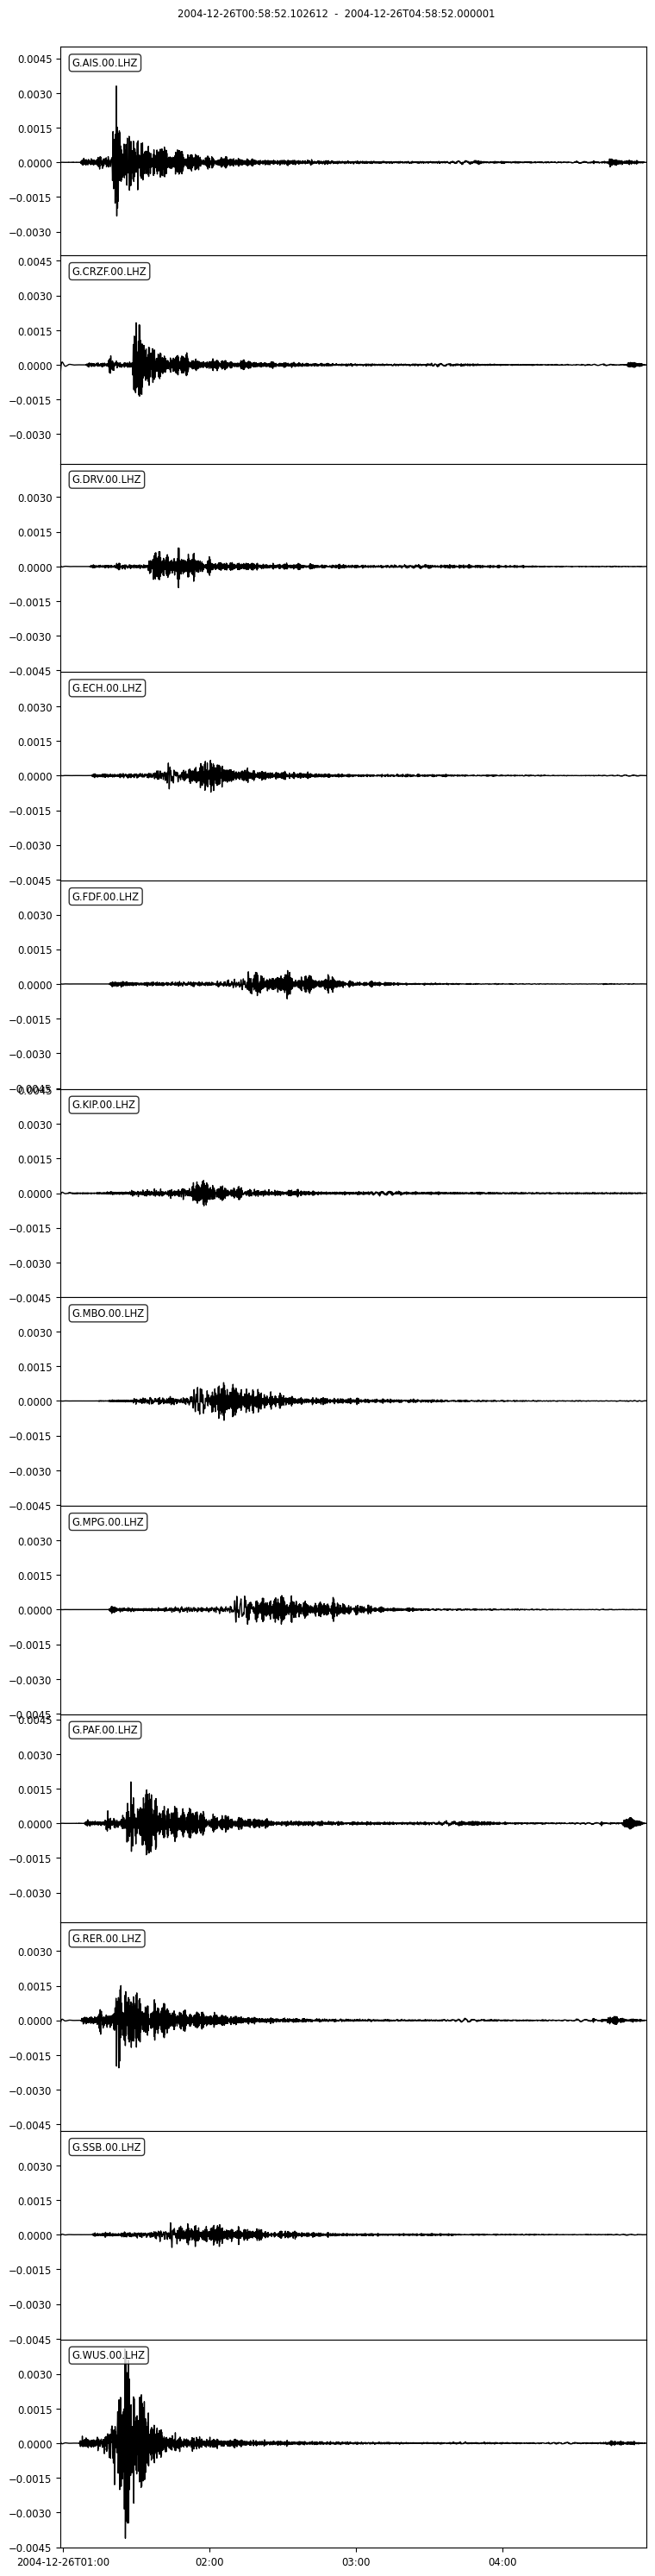

In [11]:
#Applying a bandpass filter after having removed instrumental response
#may be useful if we want to study particular frequencies of the signal
#We need to be careful what the interval of frequencies we use as it may cause significant data loss, making the time arrivals 
#of the P and S wave hard to discern, introducing errors in the location of the earthquake
st_rem_mean.filter("bandpass", freqmin=0.005, freqmax=0.2)
st_rem_mean.plot()

1.0


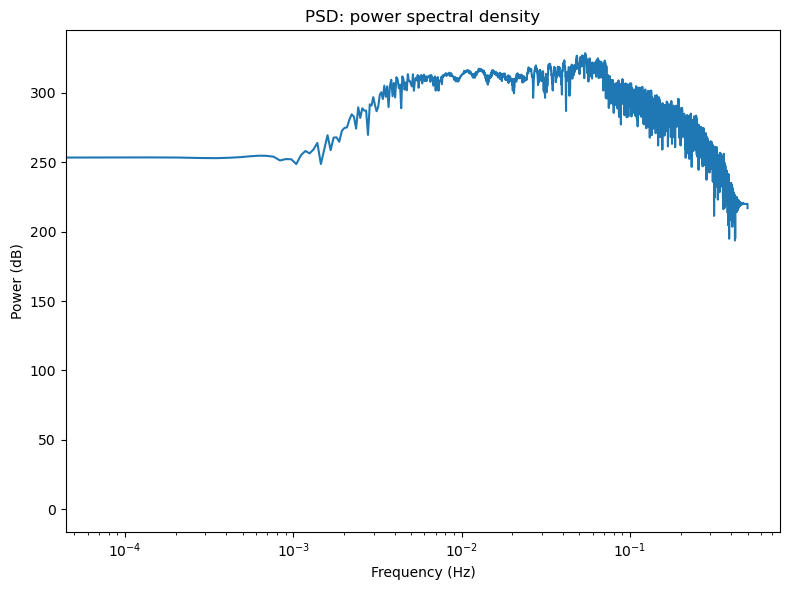

(array([0.00000000e+00, 6.94444444e-05, 1.38888889e-04, ...,
        4.99861111e-01, 4.99930556e-01, 5.00000000e-01]),
 [0.0,
  253.46767298953498,
  253.48862765642292,
  253.39699624808674,
  253.0718979739662,
  252.95687827025625,
  253.25690940178134,
  253.7026036360653,
  254.32078963996292,
  254.73118813750332,
  254.6416737314051,
  253.98960732027703,
  251.3059132583707,
  252.29444032680192,
  252.16305050188151,
  248.70602602748906,
  255.19502521769226,
  258.131711849398,
  256.3882718575062,
  259.29292523825376,
  263.92654356168924,
  248.73358374399976,
  259.4449335931547,
  269.4813609886462,
  258.7228811829514,
  267.7614305199631,
  267.9347707632469,
  264.79273950107677,
  272.7475386359384,
  274.7147740266879,
  275.1098423182679,
  280.6500895356722,
  284.4900969518876,
  282.84888125114526,
  274.1946666320205,
  289.5723387647951,
  281.9323080456959,
  288.8530360173599,
  287.2397638943501,
  287.1807395259232,
  269.7245338070594,
  291.703305733784

In [12]:
#Plot filtered signal
from tp_obspy_utils import get_periodogram
#Signal after removing the mean and instrumental response and doing a bandpass filter
x = st_rem_mean[0].data
sampling_rate = st_rem_mean[0].stats.sampling_rate
print(sampling_rate)

# two calculations of the spectrum: one plots on the screen, one plots in a png file
get_periodogram(
    x, fs=sampling_rate, semilog=True, show=True
)

1.0


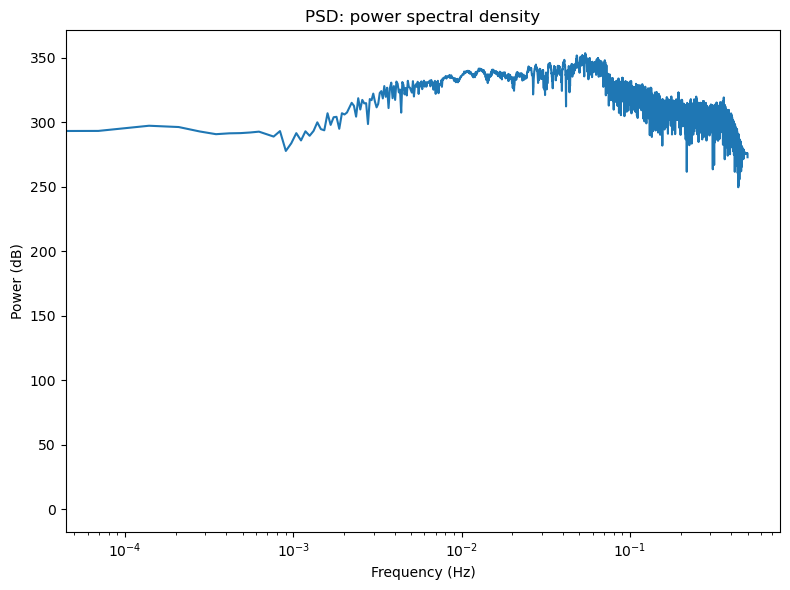

(array([0.00000000e+00, 6.94444444e-05, 1.38888889e-04, ...,
        4.99861111e-01, 4.99930556e-01, 5.00000000e-01]),
 [0.0,
  293.1787287373319,
  297.18893966522506,
  296.18981716415675,
  292.7616586520225,
  290.6490811405305,
  291.31261883156793,
  291.48042586645545,
  291.96626037373306,
  292.61553608743804,
  290.64824298335503,
  288.8064966024313,
  293.0358096690747,
  277.6678111390657,
  283.5773289405621,
  291.4491903680676,
  285.8048767306549,
  292.8750462097753,
  289.4172973543816,
  293.1798163488656,
  299.8342820495195,
  294.5692424004293,
  293.6590583342884,
  306.867359339241,
  297.84995913619696,
  303.77912960272954,
  304.1012651247713,
  294.82089243365556,
  306.90001364432044,
  305.90997087143825,
  307.4298809302018,
  311.30560498034595,
  314.9461886710377,
  312.68035193727263,
  304.2569146308791,
  318.49741618029327,
  309.7622476584245,
  317.19897690884727,
  314.5258834063913,
  314.6794591749569,
  298.50085175378734,
  317.868852509701

In [13]:
#Plot the unfiltered spectrum 
x2 = st[0].data
sampling_rate2 = st[0].stats.sampling_rate
print(sampling_rate2)
get_periodogram(
    x2, fs=sampling_rate2, semilog=True, show=True
)

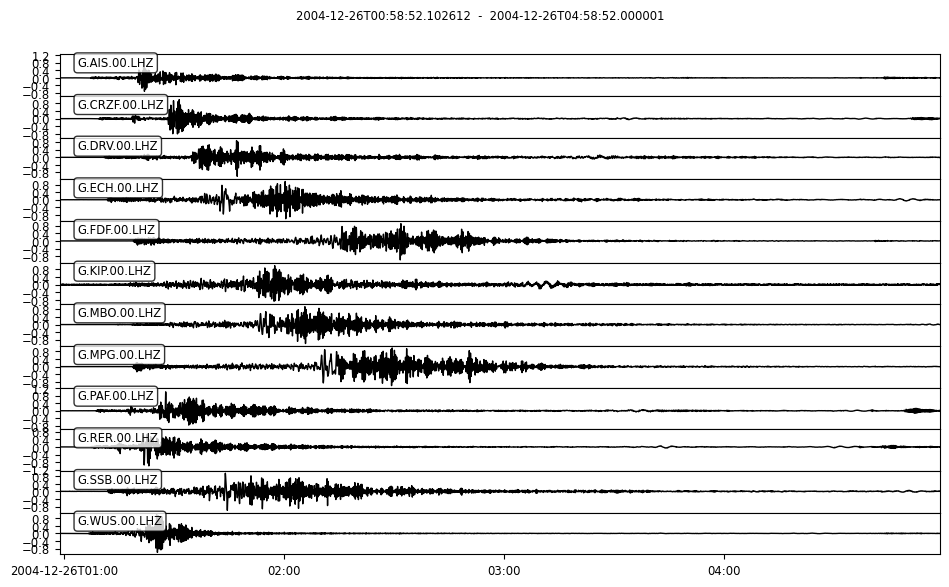

In [14]:
stplot_unfil.detrend("linear")
stplot_unfil.normalize()
stplot_unfil.plot(size=(1000,600));

In [15]:
inventory = Client("IRIS").get_stations(
    network="G",
    station="*",
    location="00",
    channel="LHZ",
    starttime=start,
    endtime=start + 14400)
print(inventory)

Inventory created at 2023-11-14T17:10:26.400600Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2004-12-26...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			G
		Stations (13):
			G.AIS (Nouvelle-Amsterdam - TAAF, France)
			G.CRZF (Port Alfred - Ile de la Possession - Crozet Islands, France)
			G.DRV (Dumont d'Urville - Terre Adelie, Antarctica)
			G.ECH (Echery - Sainte Marie aux Mines, France)
			G.FDF (Fort de France - Martinique island, France)
			G.KIP (Kipapa, Hawaii, USA)
			G.MBO (M'Bour, Senegal)
			G.MPG (Montagne des Peres - French Guiana, France)
			G.PAF (Port aux Francais - Kerguelen - TAAF, France)
			G.RER (Riviere de l'Est - Sainte Rose - La Reunion island, France)
			G.SSB (Tunnel de Badole - Saint Sauveur en Rue, France)
			G.TRIS (Tristan da Cunha)
			G.WUS (Wushi - Xinjiang Uygur, China)
		Channels (0):



In [16]:
# Access latitude and longitude for each station
stations = []
for network in inventory:
    for station in network:
        stations.append((network.code,station.code,station.latitude,station.longitude,station.elevation))
        print(f"Station: {station.code}, Latitude: {station.latitude:.4f}, Longitude: {station.longitude:.4f}")
        
print(len(stations))

Station: AIS, Latitude: -37.7963, Longitude: 77.5692
Station: CRZF, Latitude: -46.4310, Longitude: 51.8553
Station: DRV, Latitude: -66.6649, Longitude: 140.0021
Station: ECH, Latitude: 48.2163, Longitude: 7.1590
Station: FDF, Latitude: 14.7350, Longitude: -61.1463
Station: KIP, Latitude: 21.4200, Longitude: -158.0112
Station: MBO, Latitude: 14.3920, Longitude: -16.9555
Station: MPG, Latitude: 5.1101, Longitude: -52.6445
Station: PAF, Latitude: -49.3510, Longitude: 70.2107
Station: RER, Latitude: -21.1712, Longitude: 55.7399
Station: SSB, Latitude: 45.2790, Longitude: 4.5420
Station: TRIS, Latitude: -37.0681, Longitude: -12.3152
Station: WUS, Latitude: 41.2007, Longitude: 79.2165
13


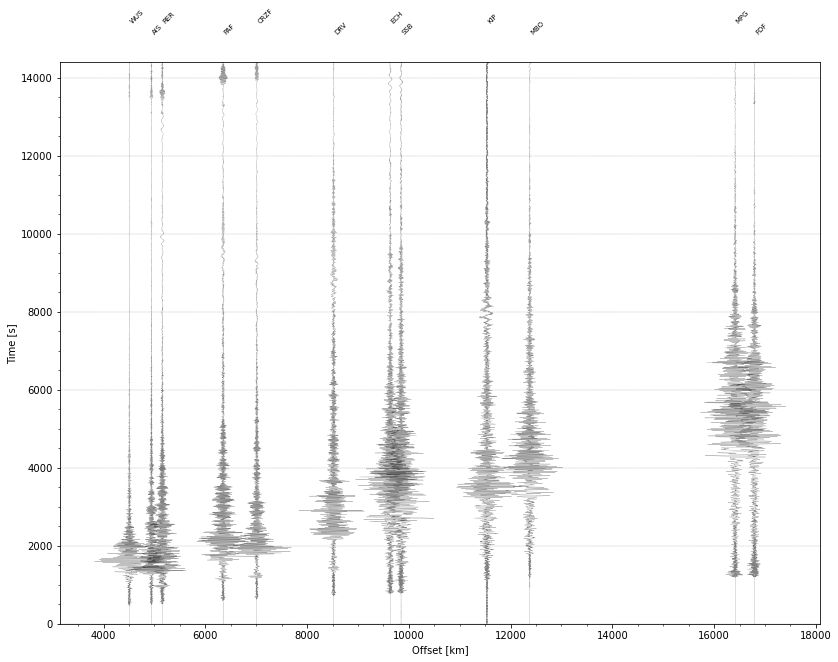

In [17]:
from tp_obspy_utils import plot_record_section

name = "record_section_ev_%s.png" % str(start)[:10]
plot_record_section(st, stations, eqo.latitude, eqo.longitude, outfile=name);

In [18]:
import folium
# Create a folium map centered around the event location
radius_km = 500  # # Radius radius_km around the epicentre of the event

event_location = (eqo.latitude, eqo.longitude)  # Our earthquake's location

m = folium.Map(location=event_location, zoom_start=5)

# Add markers for events
folium.Marker(
        location=[eqo.latitude, eqo.longitude],
        popup=f"Event: {eqo.time}",
        icon=folium.Icon(color='darkpurple', icon='sort-down')
    ).add_to(m)

# Add a translucent circle representing the radius from the event
folium.Circle(
    location=event_location,
    radius=radius_km * 1000,  # Convert radius to meters
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.2,
    popup=f"Radius: {radius_km} km"
).add_to(m)

# Add markers for stations
for network in inventory:
    for station in network:
        folium.Marker(
            location=[station.latitude, station.longitude],
            popup=f"Station: {station.code,station.latitude,station.longitude}",
            icon=folium.Icon(color='red', icon='glyphicon glyphicon-tower'),
            tooltip="Station "+station.code
        ).add_to(m)

# Display the map
m.save('seismic_map.html')  # Save the map as an HTML file

In [19]:
m

In [20]:
import folium
from obspy.clients.fdsn import Client
from obspy import UTCDateTime


event_location = (eqo.latitude, eqo.longitude)  # Our earthquake's location
radius_km = 100  # Radius radius_km around the epicentre of the event


# Create a folium map centered around the event location
m = folium.Map(location=event_location, zoom_start=6)

# Add Google Maps as the background
folium.TileLayer(
    tiles="https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}",
    attr="Google",
    name="Google Maps",
    overlay=True,
).add_to(m)

# Add marker for the event with a dark purple cone icon
folium.Marker(
    location=[event_location[0], event_location[1]],
    popup=f"Event: {eqo.time}",
    icon=folium.Icon(color='orange', icon='sort-down')
).add_to(m)

# Add markers for stations with a visible color. We use lightblue as it is easy to spot on the google earth background
for network in inventory:
    for station in network:
        folium.Marker(
            location=[station.latitude, station.longitude],
            popup=f"Station: {station.code,station.latitude,station.longitude}",
            icon=folium.Icon(color='lightblue', icon='glyphicon glyphicon-tower'),
            tooltip="Station "+station.code
        ).add_to(m)

# Add a translucent circle representing the radius from the event
folium.Circle(
    location=event_location,
    # Convert radius to meters
    radius=radius_km * 1000,  
    color='pink',
    fill=True,
    fill_color='lightpink',
    fill_opacity=0.2,
    popup=f"Radius: {radius_km} km"
).add_to(m)

# Display the map
m.save('seismic_map_with_google_maps_background.html')  # Save the map as an HTML file


In [21]:
m